<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Pablo Zambrano &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.
A la vez el dataset esgido es uno de venta de vehiculos con 2747 registros y 20 columnas.


Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
# Paquetes necesarios (Extraído de 08-Agrupamiento-Jerarquico.ipynb)
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
import numpy as np # Para manejo de arreglos
import plotly.express as px # Para visualización
from scipy.spatial.distance import cdist # Para cálculo de distancias

# Modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Estandarización de datos
from sklearn.preprocessing import StandardScaler

# Para PCA
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [4]:
try:
    df = pd.read_csv('Auto Sales data.csv', encoding='ISO-8859-1')
except:
    df = pd.read_csv('Auto Sales data.csv')

#  Mostrar algunos datos
print("--- Primeras 5 filas del dataset ---")
print(df.head())

#  Mostrar una descripción de los datos
print("\n--- Información del dataset ---")
print(df.info())

print("\n--- Descripción estadística ---")
print(df.describe())

#  Escalar los datos
# (El algoritmo no funciona con texto, así que filtramos las variables cuantitativas)
columnas_numericas = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']
X = df[columnas_numericas]

# Aplicamos StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Datos escalados (Primeras 5 filas) ---")
print(X_scaled[:5])

--- Primeras 5 filas del dataset ---
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE              

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

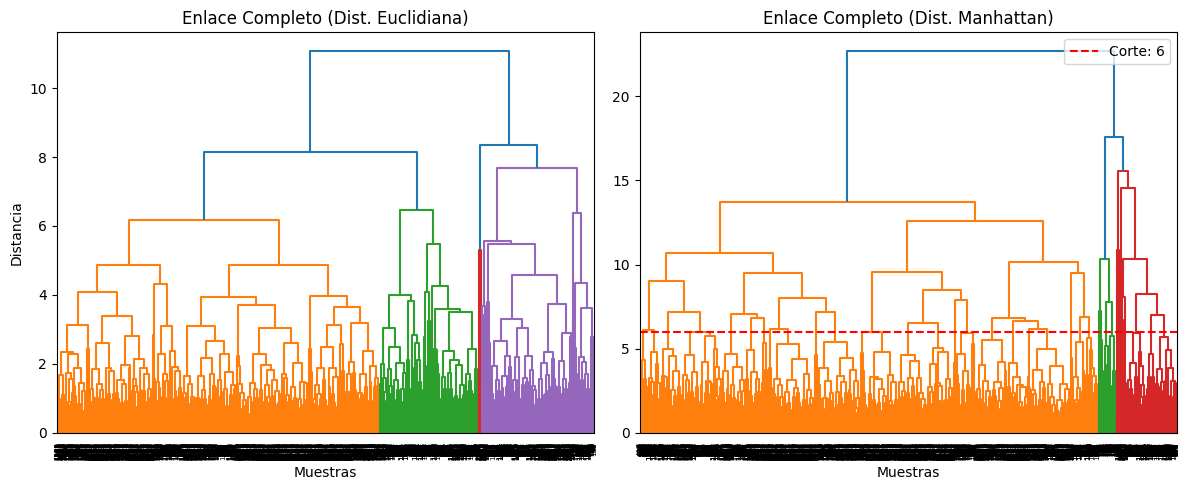

In [5]:
plt.figure(figsize=(12, 5))

# 1. Opción A: Enlace Completo + Distancia Euclidiana
plt.subplot(1, 2, 1)
Z_complete = linkage(X_scaled, method='complete', metric='euclidean')
dendrogram(Z_complete)
plt.title('Enlace Completo (Dist. Euclidiana)')
plt.ylabel('Distancia')
plt.xlabel('Muestras')

# 2. Opción B: Enlace Completo + Distancia Manhattan (Cityblock)
plt.subplot(1, 2, 2)
Z_city = linkage(X_scaled, method='complete', metric='cityblock')
dendrogram(Z_city)
plt.title('Enlace Completo (Dist. Manhattan)')
plt.xlabel('Muestras')

# DECISIÓN DE CORTE (Basada en Enlace Completo)
distancia_corte = 6
plt.axhline(y=distancia_corte, c='r', linestyle='--', label=f'Corte: {distancia_corte}')
plt.legend()

plt.tight_layout()
plt.show()

Porque es la medida estándar para comparar datos numéricos (como ventas y precios) y mide la magnitud real de las diferencias y la distancia de corte es 6  porque visualmente en el dendrograma, a esa altura se observan las líneas verticales más largas.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [6]:
# Usamos la distancia de corte que decidimos visualmente
distancia_corte = 6
etiquetas = fcluster(Z_complete, t=distancia_corte, criterion='distance')

# Guardamos las etiquetas en el DataFrame
df['Cluster'] = etiquetas
print(f"--- Se han encontrado {len(np.unique(etiquetas))} grupos con un corte de {distancia_corte} ---")
print(df['Cluster'].value_counts().sort_index())

# (Centroides)
# Agrupamos por cluster y pedimos el promedio de las variables numéricas
print("\n--- Promedios por Grupo ---")
print(df.groupby('Cluster')[columnas_numericas].mean())

# 3. REVISAR MÍNIMO Y MÁXIMO
print("\n--- Mínimos por Grupo ---")
print(df.groupby('Cluster')[columnas_numericas].min())

print("\n--- Máximos por Grupo ---")
print(df.groupby('Cluster')[columnas_numericas].max())

# 4. MOSTRAR INTEGRANTES
print("\n--- Ejemplos de integrantes ---")
for grupo in np.unique(etiquetas):
    print(f"\n> Grupo {grupo}:")
    # Filtramos y mostramos solo las columnas clave
    print(df[df['Cluster'] == grupo][['ORDERNUMBER', 'SALES', 'DEALSIZE']].head(3))

--- Se han encontrado 8 grupos con un corte de 6 ---
Cluster
1     638
2    1014
3     221
4     283
5      16
6     466
7       4
8     105
Name: count, dtype: int64

--- Promedios por Grupo ---
         QUANTITYORDERED   PRICEEACH         SALES        MSRP  \
Cluster                                                          
1              44.136364   73.893621   3272.877962   76.782132   
2              27.977318   81.870316   2269.951124   78.935897   
3              26.285068  162.713575   4270.516606  159.588235   
4              30.925795   93.655654   2818.364735  117.434629   
5              68.500000  104.095000   7138.048125  101.625000   
6              41.890558  135.019828   5647.891974  124.427039   
7              63.000000  203.565000  12598.425000  164.750000   
8              42.571429  187.570667   7928.510571  179.057143   

         DAYS_SINCE_LASTORDER  
Cluster                        
1                 2070.108150  
2                 2229.789941  
3              

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

8 segmentos de pedidos con comportamientos claramente diferenciados, a continuación se describe cada uno basado en sus promedios (centroides):

Grupo 7: "LOS VIP"


Grupo 8: "Clientes Premium Activos"



Grupo 5: "Compradores por Volumen"


Grupo 6: "Clientes de Alto Valor (Core)"



Grupo 3: "Pedidos Boutique" (221 pedidos)



Grupo 1: "Estándar en Riesgo"  

Grupo 4: "Pequeños Compradores Activos" (283 pedidos)



Grupo 2: "Inactivos de Bajo Valor" (1,014 pedidos)



---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [9]:
# Reducción de Dimensionalidad (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame temporal para el gráfico
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Agregamos la columna 'Cluster' (la convertimos a texto para que los colores sean distintos)
df_pca['Cluster'] = df['Cluster'].astype(str)

# Agregamos datos extra para que aparezcan al pasar el mouse (Hover)
df_pca['ORDERNUMBER'] = df['ORDERNUMBER']
df_pca['SALES'] = df['SALES']
df_pca['DEALSIZE'] = df['DEALSIZE']

# 3. Crear el Scatter Plot Interactivo
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['ORDERNUMBER', 'SALES', 'DEALSIZE'],
    title='Visualización de Clusters de Ventas en 2D (PCA)',
    width=900,
    height=600
)

# Ajustes visuales (opcional, para que se vea mejor)
fig.update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

pca = PCA(n_components=2)
pca.fit(X_scaled)
varianza = pca.explained_variance_ratio_.sum() * 100

print(f"\n--- Calidad de la Visualización (PCA) ---")
print(f"Varianza Explicada Acumulada: {varianza:.2f}%")
if varianza > 70:
    print(">> EXCELENTE: El gráfico 2D es una representación muy fiel de los datos.")
else:
    print(">> PRECAUCIÓN: Se está perdiendo información importante en la visualización.")


--- Calidad de la Visualización (PCA) ---
Varianza Explicada Acumulada: 80.85%
>> EXCELENTE: El gráfico 2D es una representación muy fiel de los datos.


¿Qué tan buenos te parecen los grupos?


*   Los grupos son "razonablemente buenos" para una segmentación de negocio inicial. Aunque matemáticamente hay solapamiento (silueta baja), el índice Davies-Bouldin sugiere que la separación es útil PERO no son grupos perfectos.

Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?


*   Como el porcentaje es alto (muy por encima del umbral aceptable del 60-70%), podemos confiar plenamente en que lo que vemos en el gráfico es una representación fiel de la realidad




---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [11]:
from sklearn.metrics import silhouette_score
#  COEFICIENTE DE SILUETA
# Mide qué tan parecido es un dato a su propio grupo comparado con los otros.
sil_score = silhouette_score(X_scaled, df['Cluster'])

# CÁLCULO MANUAL DE COHESIÓN Y SEPARACIÓN
# datos escalados para que las distancias sean justas

df_eval = pd.DataFrame(X_scaled, columns=columnas_numericas)
df_eval['Cluster'] = df['Cluster'].values

# Calculamos los CENTROIDES
centroides = df_eval.groupby('Cluster').mean()
centroide_global = df_eval[columnas_numericas].mean()

# COHESIÓN (SSE - Sum of Squared Errors)
# Mide la suma de las distancias al cuadrado de cada punto a su propio centroide.
cohesion = 0
for cluster_id in centroides.index:
    puntos = df_eval[df_eval['Cluster'] == cluster_id][columnas_numericas]
    centro = centroides.loc[cluster_id]
    cohesion += np.sum((puntos - centro)**2).sum()

# SEPARACIÓN (SSB - Sum of Squared Between)
separacion = 0
for cluster_id in centroides.index:
    centro = centroides.loc[cluster_id]
    n_puntos = len(df_eval[df_eval['Cluster'] == cluster_id])
    # Distancia del centro del grupo al centro global, ponderada por cantidad de puntos
    separacion += n_puntos * np.sum((centro - centroide_global)**2)

# --- RESULTADOS ---
print("--- Métricas de Evaluación ---")
print(f"1. Silueta (Calidad General):  {sil_score:.4f}  (> 0.2 es aceptable, > 0.5 es sólido)")
print(f"2. Cohesión (SSE):             {cohesion:.2f}  (Buscamos minimizar esto)")
print(f"3. Separación (SSB):           {separacion:.2f}  (Buscamos maximizar esto)")

--- Métricas de Evaluación ---
1. Silueta (Calidad General):  0.1771  (> 0.2 es aceptable, > 0.5 es sólido)
2. Cohesión (SSE):             5470.93  (Buscamos minimizar esto)
3. Separación (SSB):           8264.07  (Buscamos maximizar esto)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a

los grupos son moderadamente buenos y útiles para el negocio, aunque no están perfectamente aislados, la segmentación es válida y robusta para la toma de decisiones. Aunque la silueta sugiere que los límites no son rígidos, la alta Separación (SSB) confirma que hemos logrado identificar perfiles de comportamiento (como los "VIPs" o los "Mayoristas") que son claramente distintos al promedio.
Para poder lograr una posible mejora se pudiera aplicar una transformación logarítmica a las variables monetarias para reducir el impacto de los valores extremos

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

--- Calculando métricas para elegir el mejor método ---
> Método single     -> Silueta: 0.5233
> Método average    -> Silueta: 0.3482
> Método complete   -> Silueta: 0.2385
> Método centroid   -> Silueta: 0.3551


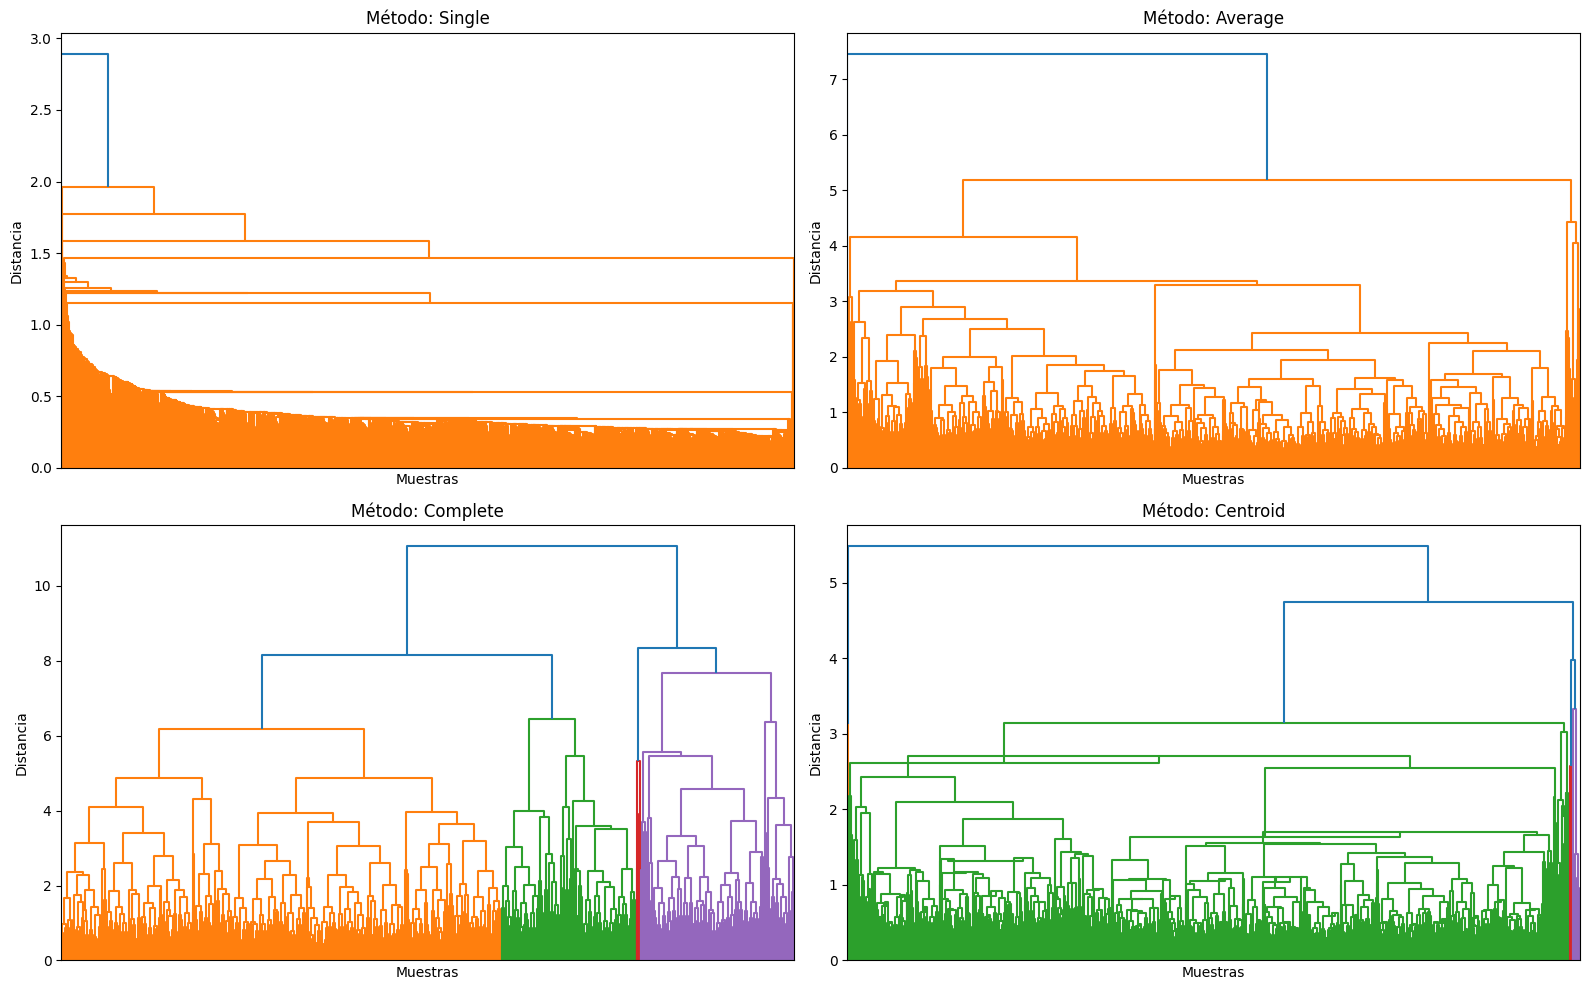


 EL MEJOR MÉTODO ES: 'SINGLE'
Con una silueta de 0.5233


In [14]:
# COMPARACIÓN VISUAL Y MÉTRICA DE MÉTODOS
# Métodos clásicos del cuaderno 08: Single, Average, Complete, Centroid

# Configuración de la figura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

metodos = ['single', 'average', 'complete', 'centroid']
resultados = []

print("--- Calculando métricas para elegir el mejor método ---")

for i, metodo in enumerate(metodos):
    Z_iter = linkage(X_scaled, method=metodo, metric='euclidean')

    # 2. Dibujar Dendrograma
    dendrogram(Z_iter, ax=axes[i], no_labels=True)
    axes[i].set_title(f'Método: {metodo.capitalize()}')
    axes[i].set_xlabel('Muestras')
    axes[i].set_ylabel('Distancia')

    # 3. Calcular Silueta
    k_objetivo = 4
    labels = fcluster(Z_iter, t=k_objetivo, criterion='maxclust')

    # Validamos si se pudieron formar los grupos (a veces single falla y pone todos en 1)
    if len(np.unique(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = -1 # Penalización si no logra separar nada

    resultados.append({'Método': metodo, 'Silueta (k=4)': score})
    print(f"> Método {metodo.ljust(10)} -> Silueta: {score:.4f}")

plt.tight_layout()
plt.show()

# --- CONCLUSIÓN ---
best_result = max(resultados, key=lambda x: x['Silueta (k=4)'])
print(f"\n EL MEJOR MÉTODO ES: '{best_result['Método'].upper()}'")
print(f"Con una silueta de {best_result['Silueta (k=4)']:.4f}")